In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 50}
matplotlib.rc('font', **font)
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=6, fformat="%.2f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [2]:
def plot_cwnd(df, nflows, dt, ql, delay, flowid, subflows, directory=".", ncolors=None, ax=None, show=False,  
                    xlower=None, xupper=None, ylower=None, yupper=None, axformat=OOMFormatter(6, '%.2f'),
                    linewidth=1, linestyle="--", markersize=20, marker='.', mew=0, alpha=1):
    sns.set_palette(sns.color_palette("husl", ncolors if ncolors != None else len(subflows)))
    tstamp = df[(df['dt']==dt)&(df['ql']==ql)&(df['delay']==delay)&(df['nflows']==nflows)]['tstamp']
    cwndfile = directory + "/cwndlog_" + tstamp.iat[0]
    cdata = pd.read_csv(cwndfile,  header=None, index_col=None, names=['t', 'flowid', 'subflow', 'cwnd'])
    sdf = cdata[(cdata['flowid']==flowid)]
    if ylower is None: 
        strlower = str(int(min(sdf['cwnd'])))
        ylower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if yupper is None:
        strupper = str(int(max(sdf['cwnd'])))
        yupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    if xlower is None: 
        strlower = str(int(min(sdf['t'])))
        xlower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if xupper is None:
        strupper = str(int(max(sdf['t'])))
        xupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    for n in subflows:
        msdf = sdf[sdf['subflow']==n]
        ax = msdf.plot(ax=ax, x='t', y='cwnd', 
                             title='dt: '+str(dt)+', ql: '+str(ql)+', delay: '+str(delay)+'us'+", nflows: " +str(nflows)+"flowid: "+str(flowid),
                             linewidth=linewidth, linestyle=linestyle, marker=marker, markersize=markersize,
                             xlim=(xlower, xupper), logx=False, ylim=(ylower, yupper), mew=mew, alpha=alpha,
                             figsize=(9,6), label='subflows'+str(n))
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True, which='minor', axis='x', linestyle='dotted')
        ax.grid(True, which='major', axis='x', linestyle='dotted')
        ax.grid(True, which='minor', axis='y', linestyle='dotted')
        ax.grid(True, which='major', axis='y', linestyle='dotted')
        ax.set_xlabel('time (us)')
        ax.set_ylabel('cwnd')
#         ax.yaxis.set_major_formatter(axformat)
    if show:
        plt.show()
    else:
        return ax
    

In [20]:
def plot_state(df, nflows, dt, ql, delay, flowid, subflows, directory=".", ncolors=None, ax=None, show=False,  
                    xlower=None, xupper=None, axformat=OOMFormatter(6, '%.2f'),
                    linewidth=1, linestyle=":", markersize=5, marker='.', mew=0, alpha=1):
    sns.set_palette(sns.color_palette("husl", ncolors if ncolors != None else len(subflows)))
    tstamp = df[(df['dt']==dt)&(df['ql']==ql)&(df['delay']==delay)&(df['nflows']==nflows)]['tstamp']
    cwndfile = directory + "/congStatelog_" + tstamp.iat[0]
    cdata = pd.read_csv(cwndfile,  header=None, index_col=None, names=['t', 'flowid', 'subflow', 'csfrom', 'csto'])
    sdf = cdata[(cdata['flowid']==flowid)]
    if xlower is None: 
        strlower = str(int(min(sdf['t'])))
        xlower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if xupper is None:
        strupper = str(int(max(sdf['t'])))
        xupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    for n in subflows:
        msdf = sdf[sdf['subflow']==n]
        ax = msdf.plot(ax=ax, x='t', y='csto', 
                             title='dt: '+str(dt)+', ql: '+str(ql)+', delay: '+str(delay)+'us'+", nflows: " +str(nflows)+"flowid: "+str(flowid),
                             linewidth=linewidth, linestyle=linestyle, marker=marker, markersize=markersize,
                             xlim=(xlower, xupper), logx=False, ylim=(-1, 5), mew=mew, alpha=alpha,
                             figsize=(9,6), label='subflows'+str(n))
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True, which='minor', axis='x', linestyle='dotted')
        ax.grid(True, which='major', axis='x', linestyle='dotted')
        ax.grid(True, which='minor', axis='y', linestyle='dotted')
        ax.grid(True, which='major', axis='y', linestyle='dotted')
        ax.set_xlabel('time (us)')
        ax.set_ylabel('state')
#         ax.yaxis.set_major_formatter(axformat)
    if show:
        plt.show()
    else:
        return ax
    

In [21]:
def plot_ql(df, nflows, dt, ql, delay, nodes, directory=".", ncolors=None, ax=None, show=False,  
                    xlower=None, xupper=None, ylower=None, yupper=None, axformat=OOMFormatter(6, '%.2f'),
                    linewidth=0, linestyle=None, markersize=5, marker='.', mew=0, alpha=1):
    sns.set_palette(sns.color_palette("husl", ncolors if ncolors != None else len(nodes)))
    tstamp = df[(df['dt']==dt)&(df['ql']==ql)&(df['delay']==delay)&(df['nflows']==nflows)]['tstamp']
    cwndfile = directory + "/qllog_" + tstamp.iat[0]
    cdata = pd.read_csv(cwndfile,  header=None, index_col=None, names=['t', 'node', 'size'])
    sdf = cdata
    if ylower is None: 
        strlower = str(int(min(sdf['size'])))
        ylower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if yupper is None:
        strupper = str(int(max(sdf['size'])))
        yupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    if xlower is None: 
        strlower = str(int(min(sdf['t'])))
        xlower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if xupper is None:
        strupper = str(int(max(sdf['t'])))
        xupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    for n in nodes:
        msdf = sdf[sdf['node']==n]
        ax = msdf.plot(ax=ax, x='t', y='size', 
                             title='dt: '+str(dt)+', ql: '+str(ql)+', delay: '+str(delay)+'us'+", nflows: " +str(nflows),
                             linewidth=linewidth, linestyle=linestyle, marker=marker, markersize=markersize,
                             xlim=(xlower, xupper), logx=False, ylim=(ylower, yupper), mew=mew, alpha=alpha,
                             figsize=(9,6), label='subflows'+str(n))
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True, which='minor', axis='x', linestyle='dotted')
        ax.grid(True, which='major', axis='x', linestyle='dotted')
        ax.grid(True, which='minor', axis='y', linestyle='dotted')
        ax.grid(True, which='major', axis='y', linestyle='dotted')
        ax.set_xlabel('time (us)')
        ax.set_ylabel('qlen')
#         ax.yaxis.set_major_formatter(axformat)
    if show:
        plt.show()
    else:
        return ax

In [45]:
def plot_dql(df, nflows, dt, ql, delay, subflows, directory=".", ncolors=None, ax=None, show=False,  
                    xlower=None, xupper=None, ylower=None, yupper=None, axformat=OOMFormatter(6, '%.2f'),
                    linewidth=0, linestyle=None, markersize=5, marker='.', mew=0, alpha=1):
    sns.set_palette(sns.color_palette("husl", ncolors if ncolors != None else len(subflows)))
    tstamp = df[(df['dt']==dt)&(df['ql']==ql)&(df['delay']==delay)&(df['nflows']==nflows)]['tstamp']
    cwndfile = directory + "/qllog_" + tstamp.iat[0]
    cdata = pd.read_csv(cwndfile,  header=None, index_col=None, names=['t', 'size', 'sid', 'cid', 'netstate'])
    sdf = cdata
    if ylower is None: 
        strlower = str(int(min(sdf['size'])))
        ylower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if yupper is None:
        strupper = str(int(max(sdf['size'])))
        yupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    if xlower is None: 
        strlower = str(int(min(sdf['t'])))
        xlower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if xupper is None:
        strupper = str(int(max(sdf['t'])))
        xupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    for n in subflows:
        msdf = sdf[sdf['cid']==n]
        ax = msdf.plot(ax=ax, x='t', y='size', 
                             title='dt: '+str(dt)+', ql: '+str(ql)+', delay: '+str(delay)+'us'+", nflows: " +str(nflows),
                             linewidth=linewidth, linestyle=linestyle, marker=marker, markersize=markersize,
                             xlim=(xlower, xupper), logx=False, ylim=(ylower, yupper), mew=mew, alpha=alpha,
                             figsize=(9,6), label='subflows'+str(n))
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True, which='minor', axis='x', linestyle='dotted')
        ax.grid(True, which='major', axis='x', linestyle='dotted')
        ax.grid(True, which='minor', axis='y', linestyle='dotted')
        ax.grid(True, which='major', axis='y', linestyle='dotted')
        ax.set_xlabel('time (us)')
        ax.set_ylabel('qlen')
#         ax.yaxis.set_major_formatter(axformat)
    if show:
        plt.show()
    else:
        return ax

In [22]:
def plot_single(df, ql, delay, attr, all_nflows, ncolors=None,
                    unit='us', ax=None, show=False, 
                    xlower=None, xupper=None, ylower=None, yupper=None, axformat=OOMFormatter(6, '%.2f'),
                    linewidth=1, linestyle="--", markersize=20, marker='.', mew=0, alpha=1):
    sns.set_palette(sns.color_palette("husl", ncolors if ncolors != None else len(all_nflows)))
    sdf = df[(df['ql']==ql)&(df['delay']==delay)]
    if ylower is None: 
        strlower = str(int(min(sdf[attr])))
        ylower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if yupper is None:
        strupper = str(int(max(sdf[attr])))
        yupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    if xlower is None: 
        strlower = str(int(min(sdf['dt'])))
        xlower = 0 if len(strlower)<=1 else (int(strlower[0:2]))*10**(len(strlower)-2)
    if xupper is None:
        strupper = str(int(max(sdf['dt'])))
        xupper = (int(strupper[0])+1) if len(strupper)<=1 else (int(strupper[0:2])+1)*10**(len(strupper)-2)
    for n in all_nflows:
        msdf = sdf[sdf['nflows']==n]
        ax = msdf.plot(ax=ax, x='dt', y=attr, 
                             title='ql: '+str(ql) + ', delay: '+str(delay)+'us', 
                             linewidth=linewidth, linestyle=linestyle, marker=marker, markersize=markersize,
                             xlim=(xlower, xupper), logx=True, ylim=(ylower, yupper), mew=mew, alpha=alpha,
                             figsize=(18,12), label=str(n)+' flows')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True, which='minor', axis='x', linestyle='dotted')
        ax.grid(True, which='major', axis='x', linestyle='dotted')
        ax.grid(True, which='minor', axis='y', linestyle='dotted')
        ax.grid(True, which='major', axis='y', linestyle='dotted')
        ax.set_xlabel('dt (us)')
        ax.set_ylabel('{:s}{:s}'.format(attr,'' if unit is None else ' ('+unit+')'))
#         ax.yaxis.set_major_formatter(axformat)
    if show:
        plt.show()
    else:
        return ax
    

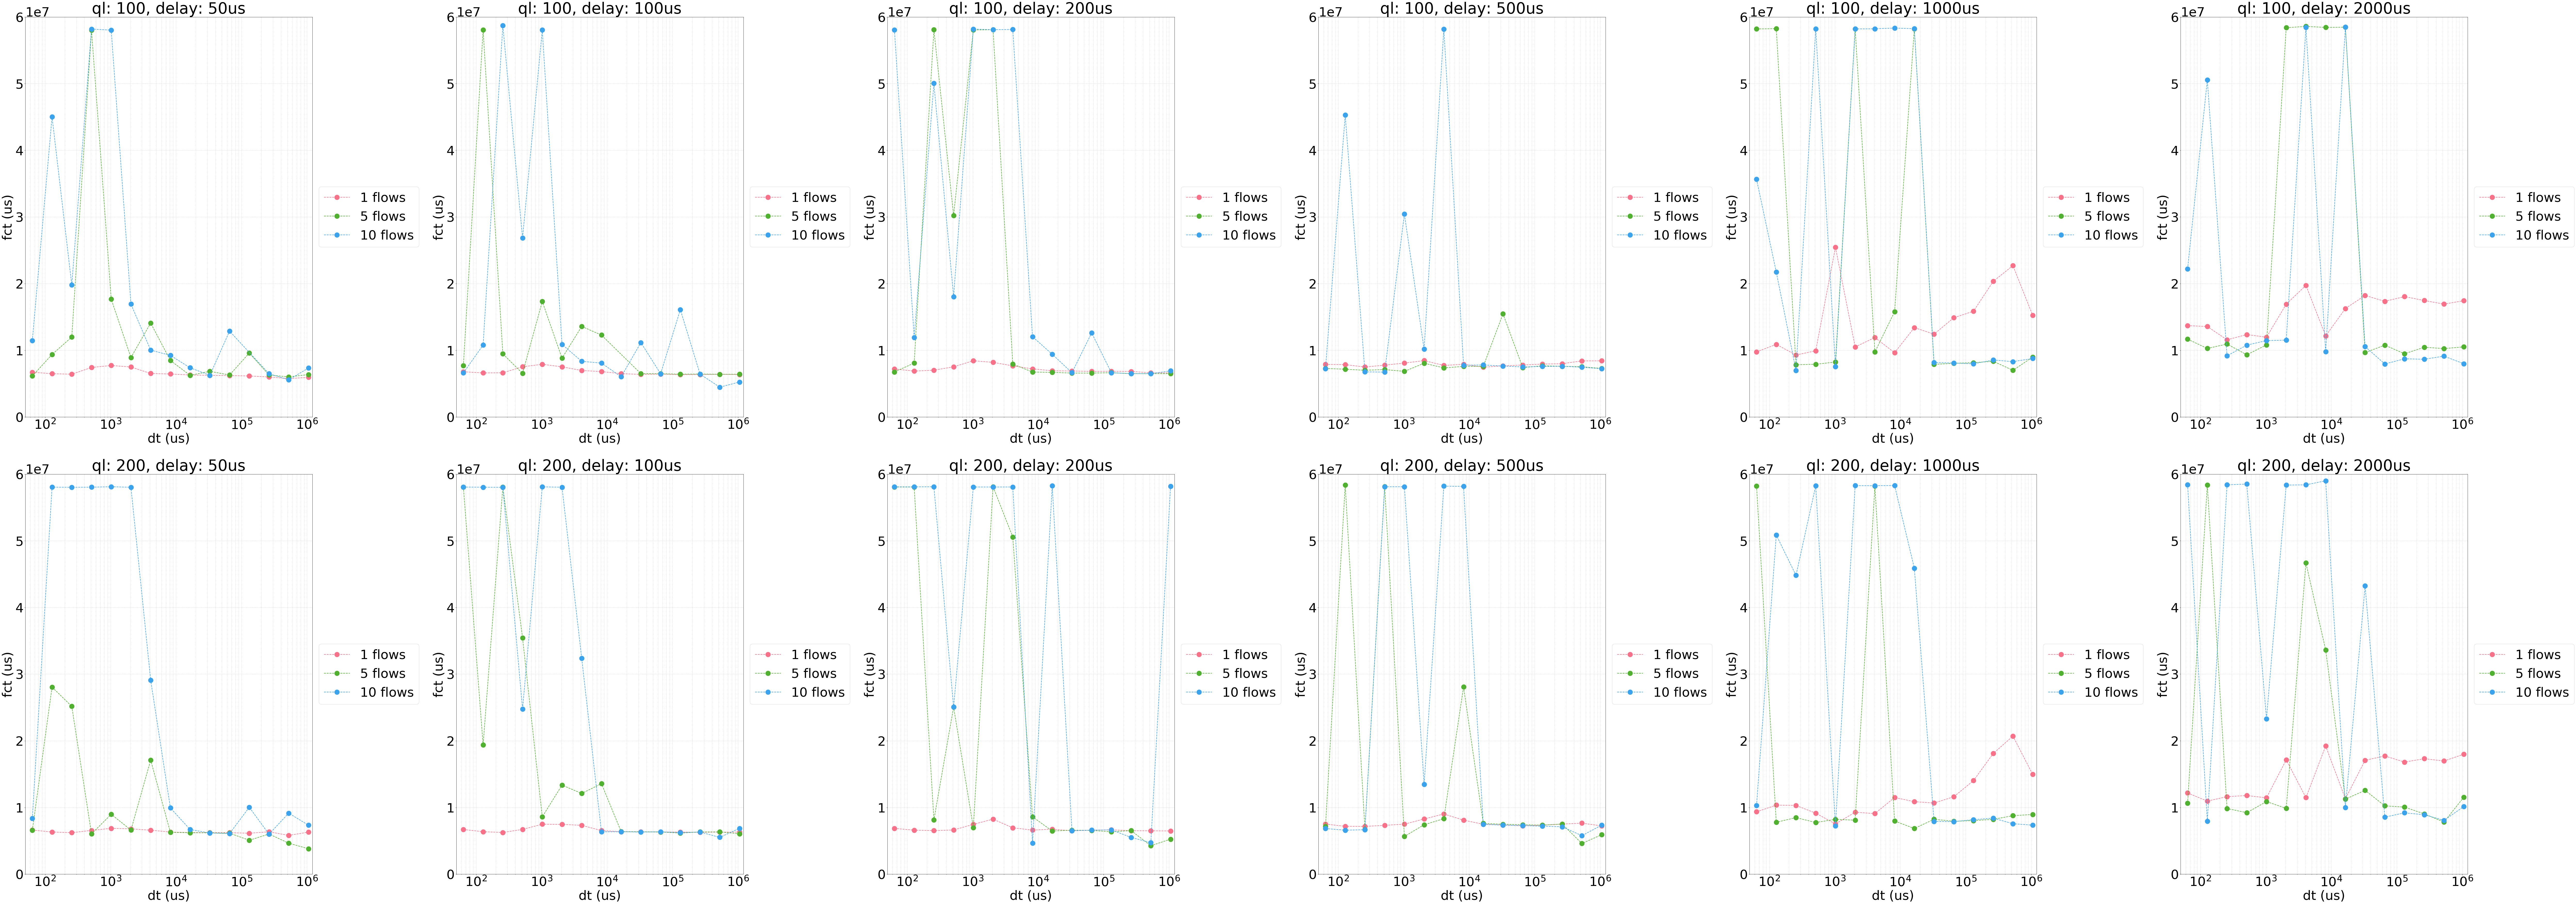

In [8]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 50}
matplotlib.rc('font', **font)

all_ql = [100, 200]
all_delay = [50, 100, 200, 500, 1000, 2000]
all_nflows = [1, 5, 10]
# pdp = "/Users/frankwang/Google Drive/GDocs/College/Summer 19/research/log_0723/pdatanormal"
pdp = "pdata"
pdata = pd.read_csv(pdp, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'dt', 'nflows', 'ql', 'delay', 'fct', 'retrans', 'rto', 'retr', 'syn', 'rtt'])

pavg = (pdata
        .groupby(['nflows', 'dt', 'ql', 'delay'], as_index=False)
        .agg({'fct': np.min, 'retrans': np.min, 'rto': np.min, 'rtt': np.min, "syn": np.min})
       )
pavg['delay'] = pavg['delay'].apply(lambda x: int(x/2000))
pavg['fct'] = pavg['fct'].apply(lambda x: int(x-1000000))

fig = plt.figure()
ax = None
index = 0

for ql in all_ql:
    for delay in all_delay:
        ax = fig.add_subplot(len(all_ql), len(all_delay), index+1)
        plot_single(pavg, ql, delay, 'fct', all_nflows, linewidth=2, linestyle="--", markersize=40, marker='.',
                    unit='us', ax=ax, xlower=50, xupper=1200000, ylower=0, yupper=60000000)
        index += 1

fig.patch.set_facecolor('white')
fig.set_figheight(50)
fig.set_figwidth(140)
plt.tight_layout()
plt.show()



In [36]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)


pdp = "pdata"
pdata = pd.read_csv(pdp, sep='\t', header=None, index_col=None,
                    names=['tstamp', 'dt', 'nflows', 'ql', 'delay', 'fct', 'retrans', 'rto', 'rec', 'syn', 'rtt'])
pdata['delay'] = pdata['delay'].apply(lambda x: int(x/2000))

# fig = plt.figure()
# ax = None
# index = 0
# fig.add_subplot(1, 1, index+1)

# fig.patch.set_facecolor('white')
# fig.set_figheight(20)
# fig.set_figwidth(20)
# plt.tight_layout()
# plt.show()

<IPython.core.display.Javascript object>


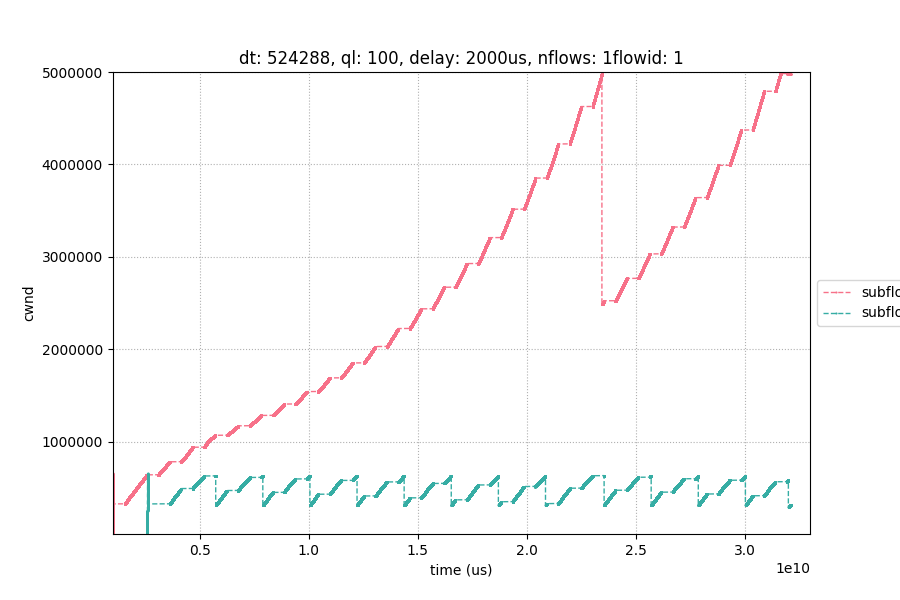

<IPython.core.display.Javascript object>


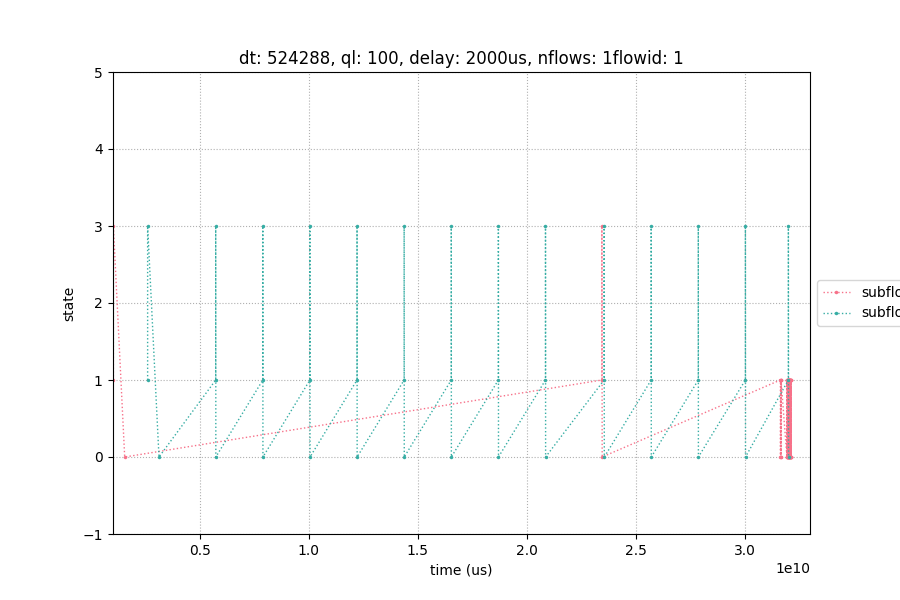

<IPython.core.display.Javascript object>


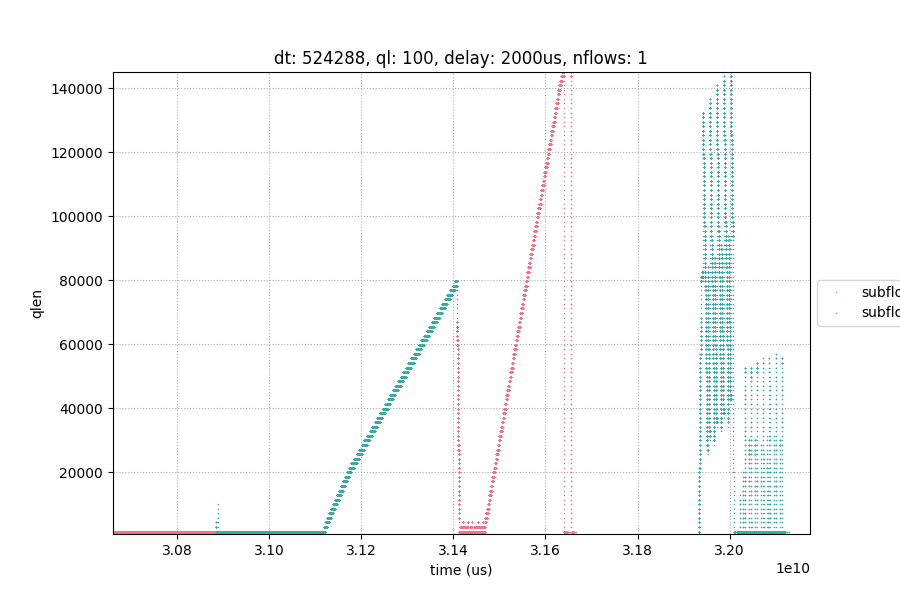

In [46]:
%matplotlib notebook
plot_cwnd(pdata, 1, 524288, 100, 2000, 1, [0,1], markersize=3)
plot_state(pdata, 1, 524288, 100, 2000, 1, [0,1], markersize=5)
plot_dql(pdata, 1, 524288, 100, 2000, [0,1], markersize=2)

<IPython.core.display.Javascript object>


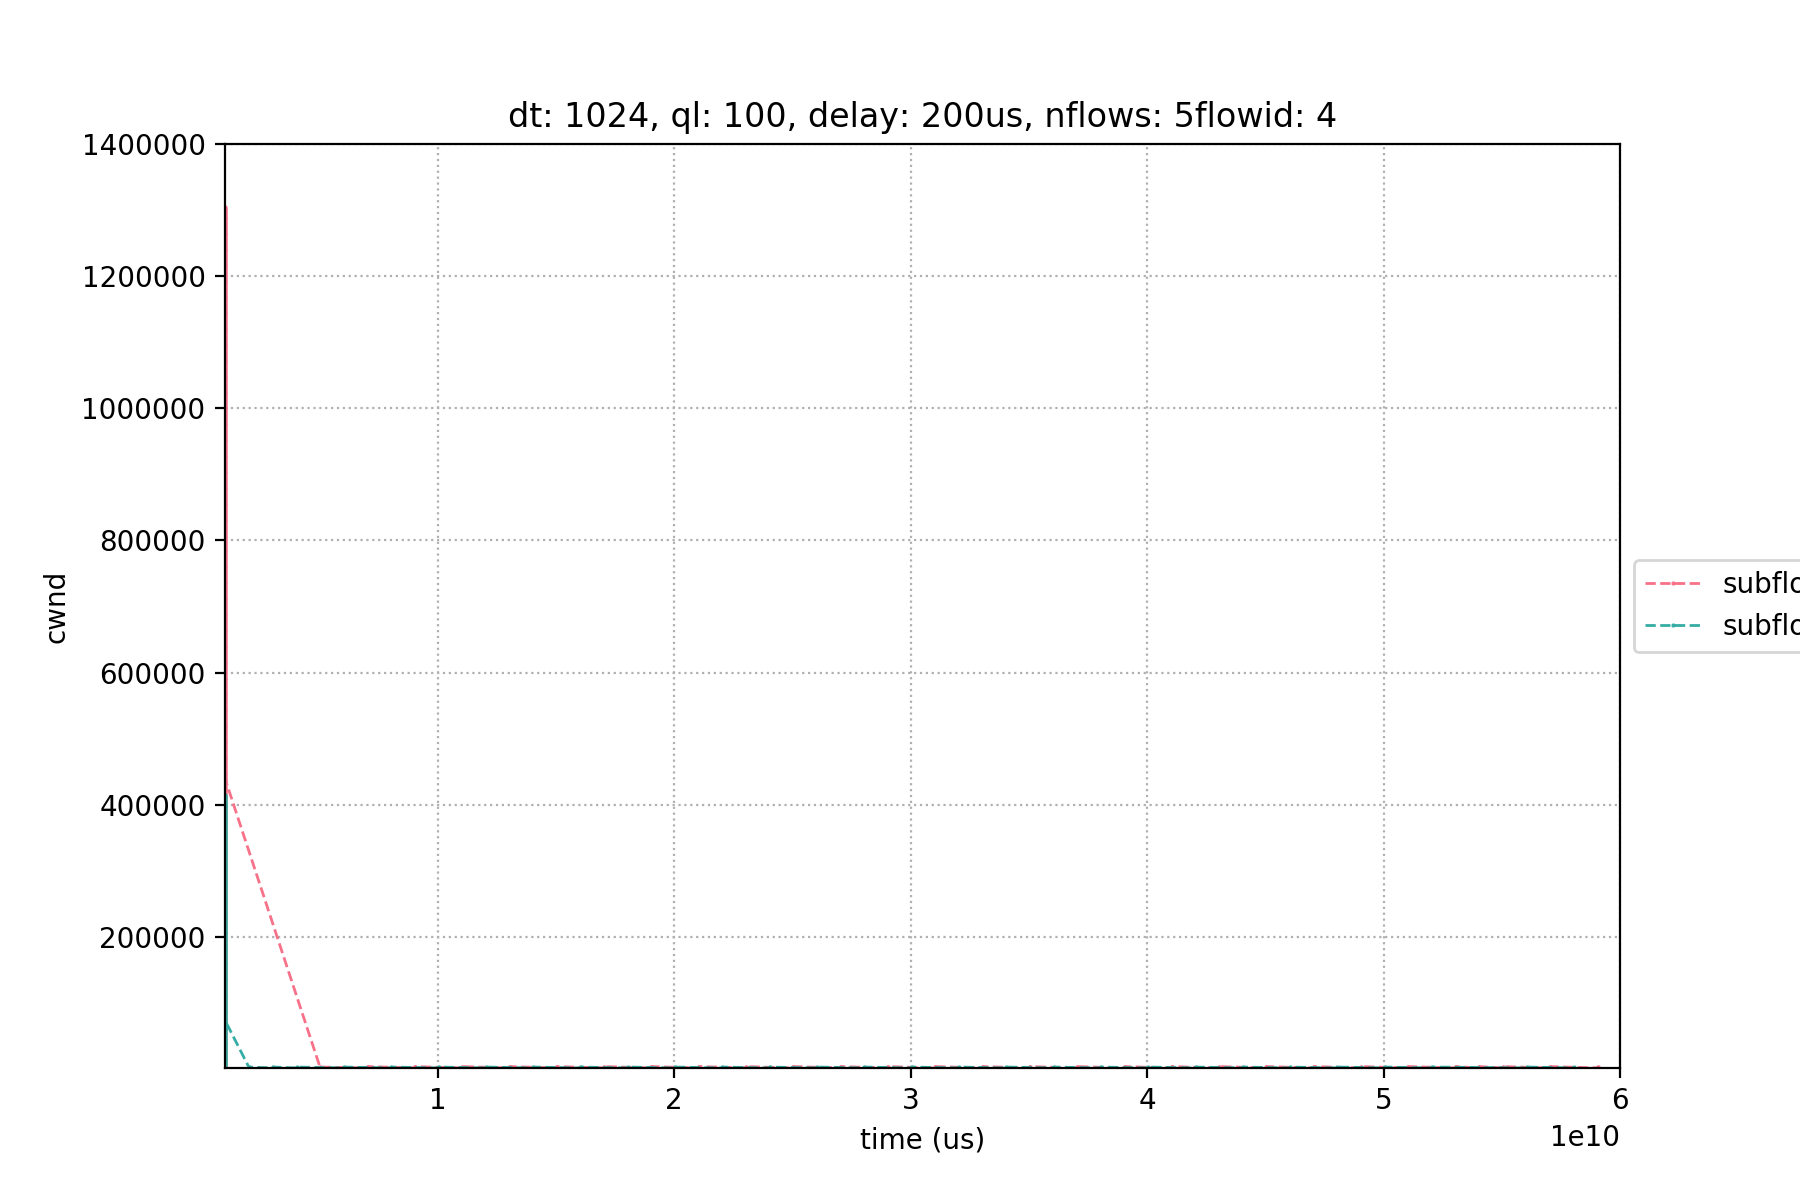

<IPython.core.display.Javascript object>


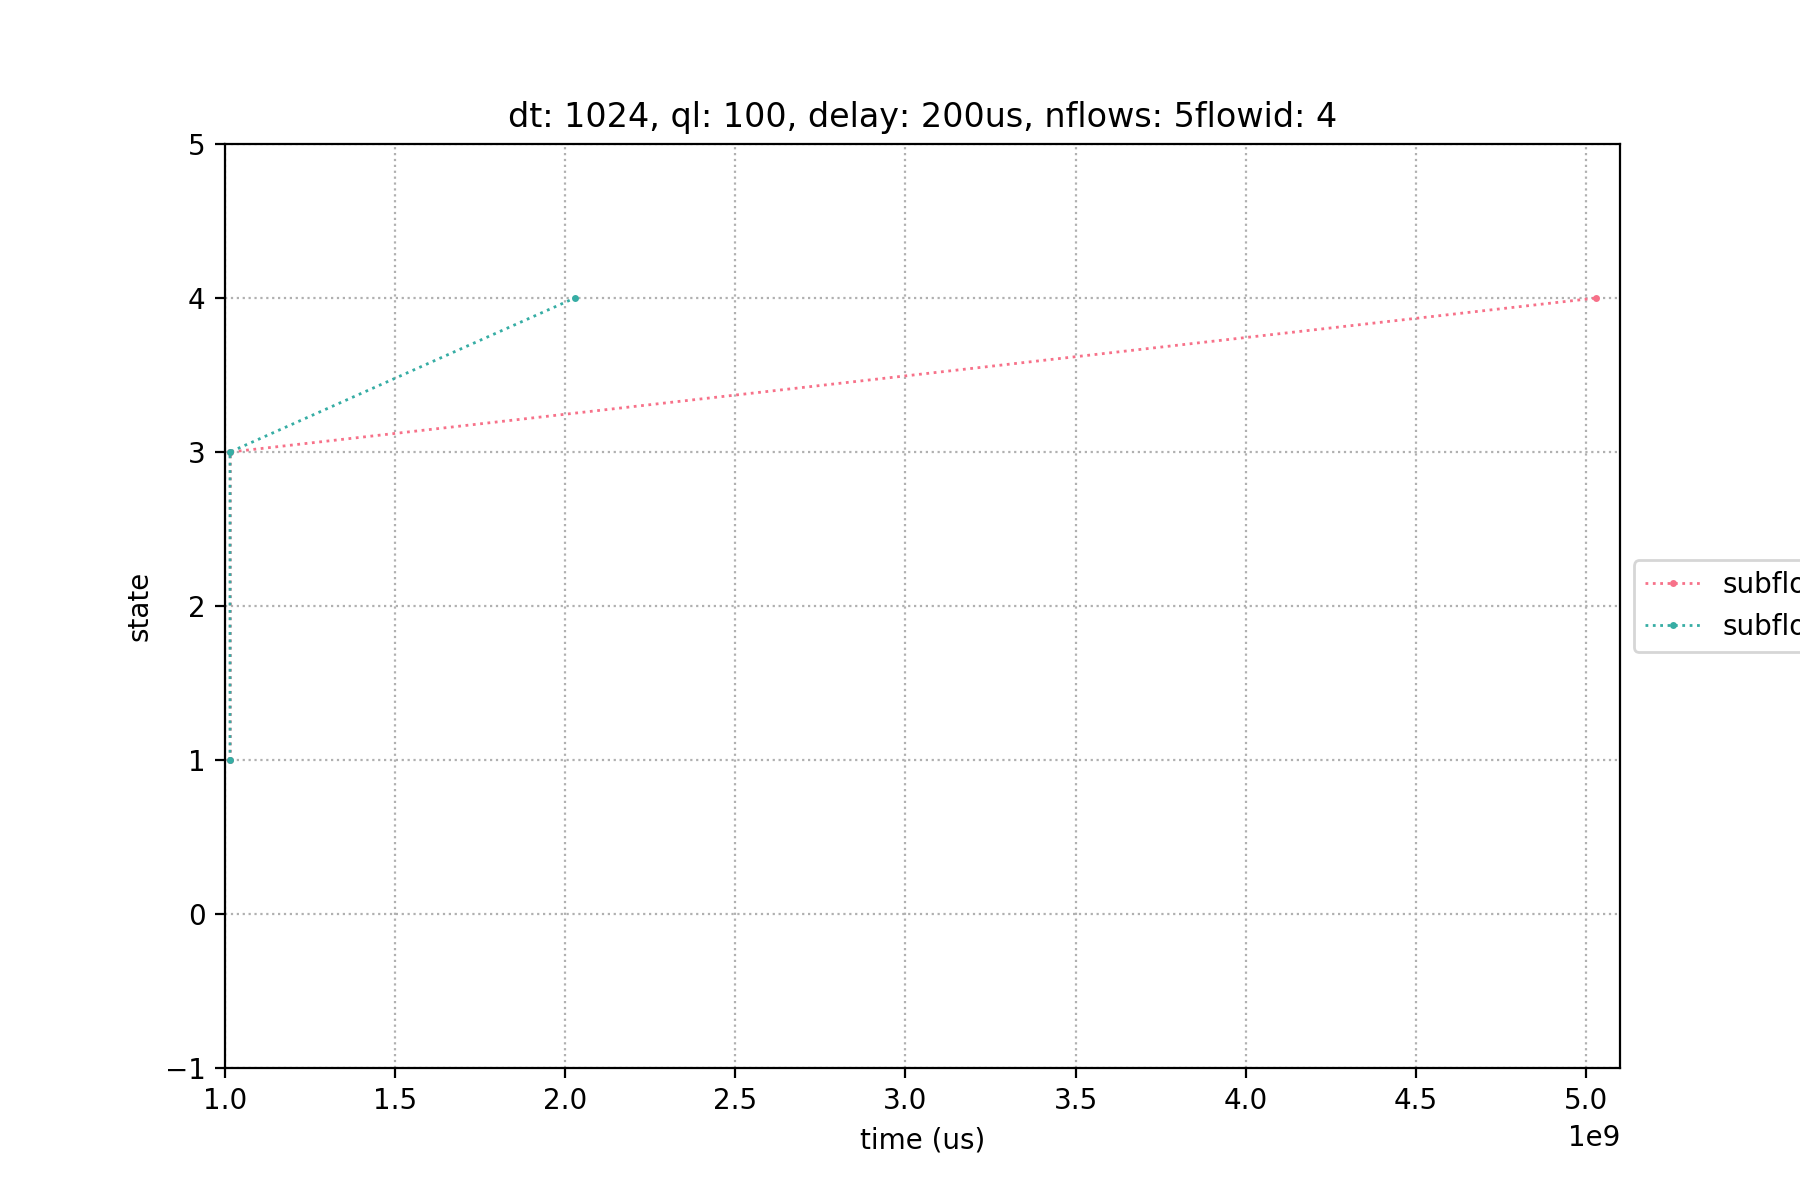

In [31]:
%matplotlib notebook
plot_cwnd(pdata, 5, 1024, 100, 200, 4, [0,1], markersize=3)
plot_state(pdata, 5, 1024, 100, 200, 4, [0,1], markersize=5)
# plot_ql(pdata, 5, 1024, 100, 200, [2, 3], markersize=2)

In [ ]:
%matplotlib notebook
plot_cwnd(pdata, 1, 131072, 100, 2000, 1, [0,1], markersize=2, directory=".")
plot_state(pdata, 1, 131072, 100, 2000, 1, [0,1], markersize=2, directory=".")

<IPython.core.display.Javascript object>


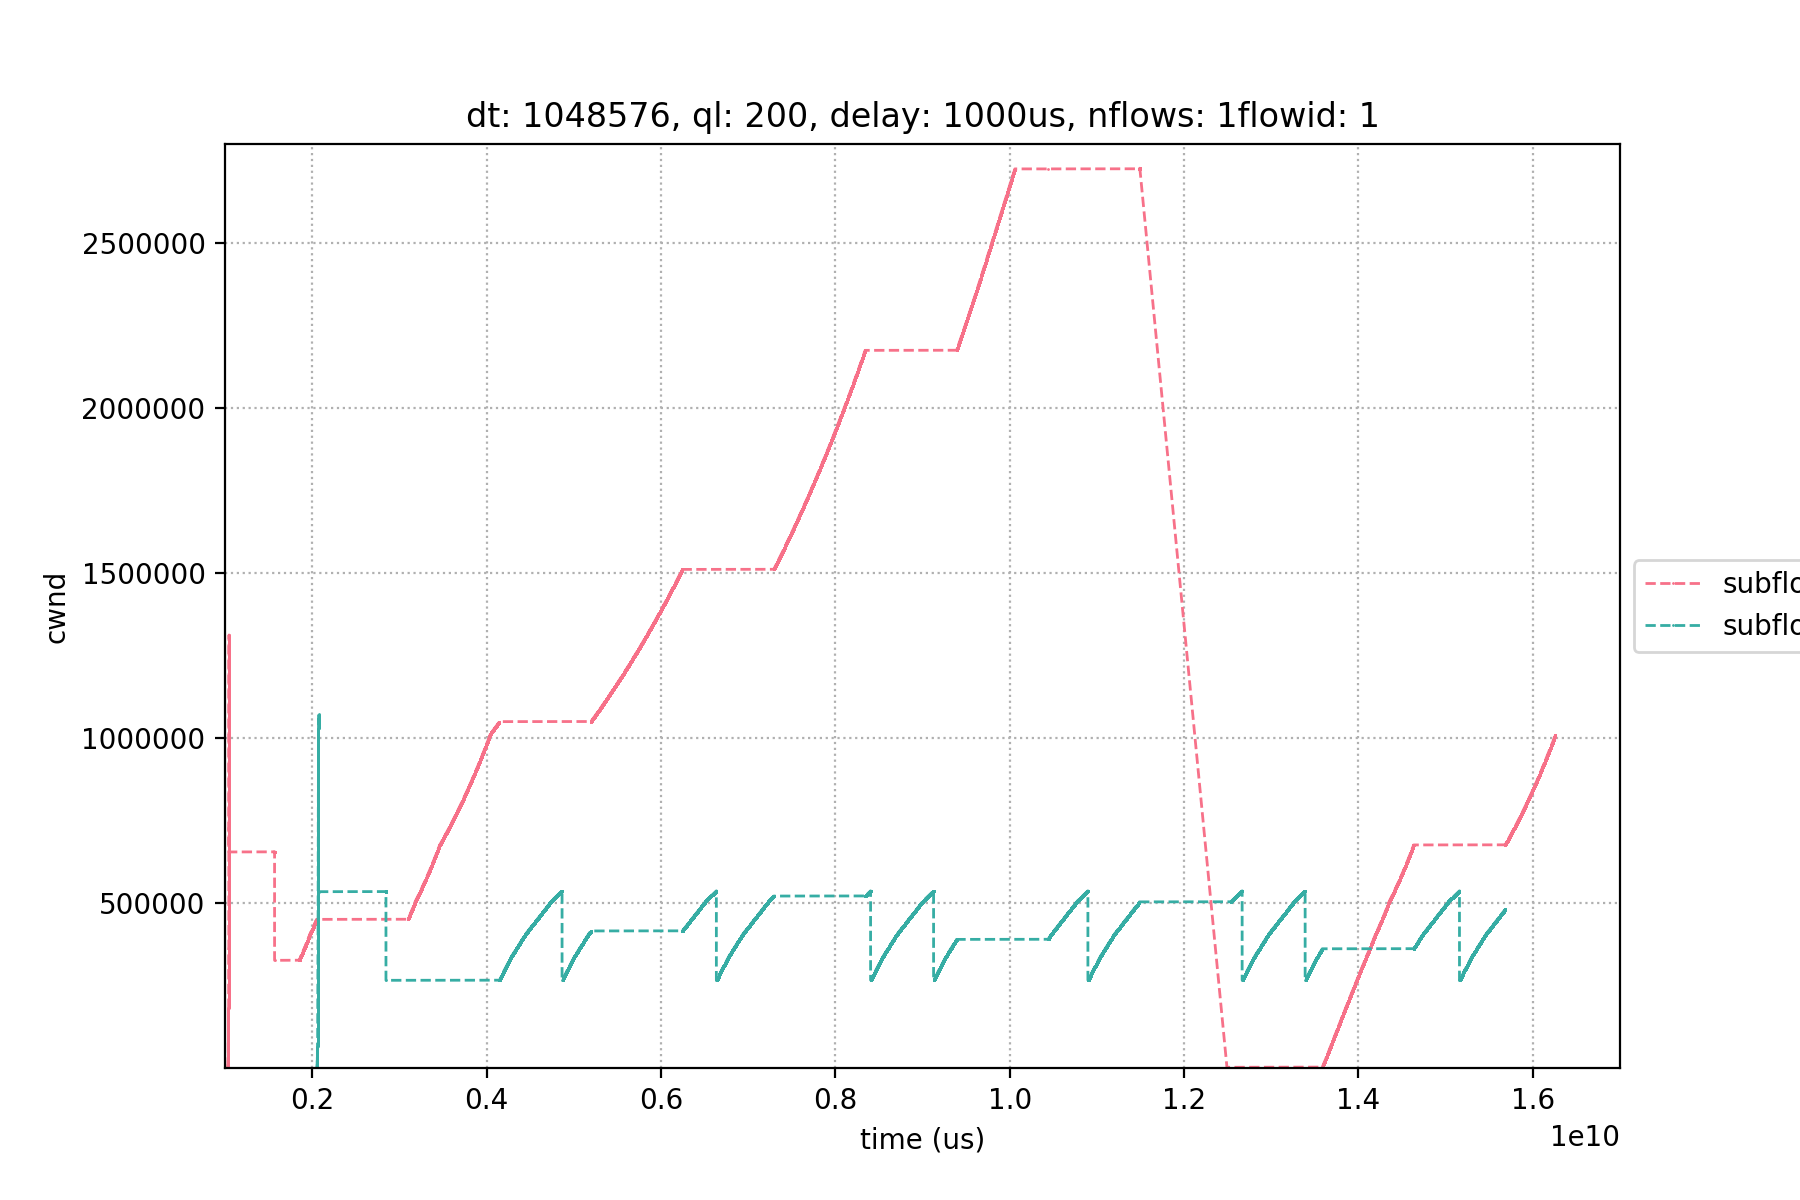

<IPython.core.display.Javascript object>


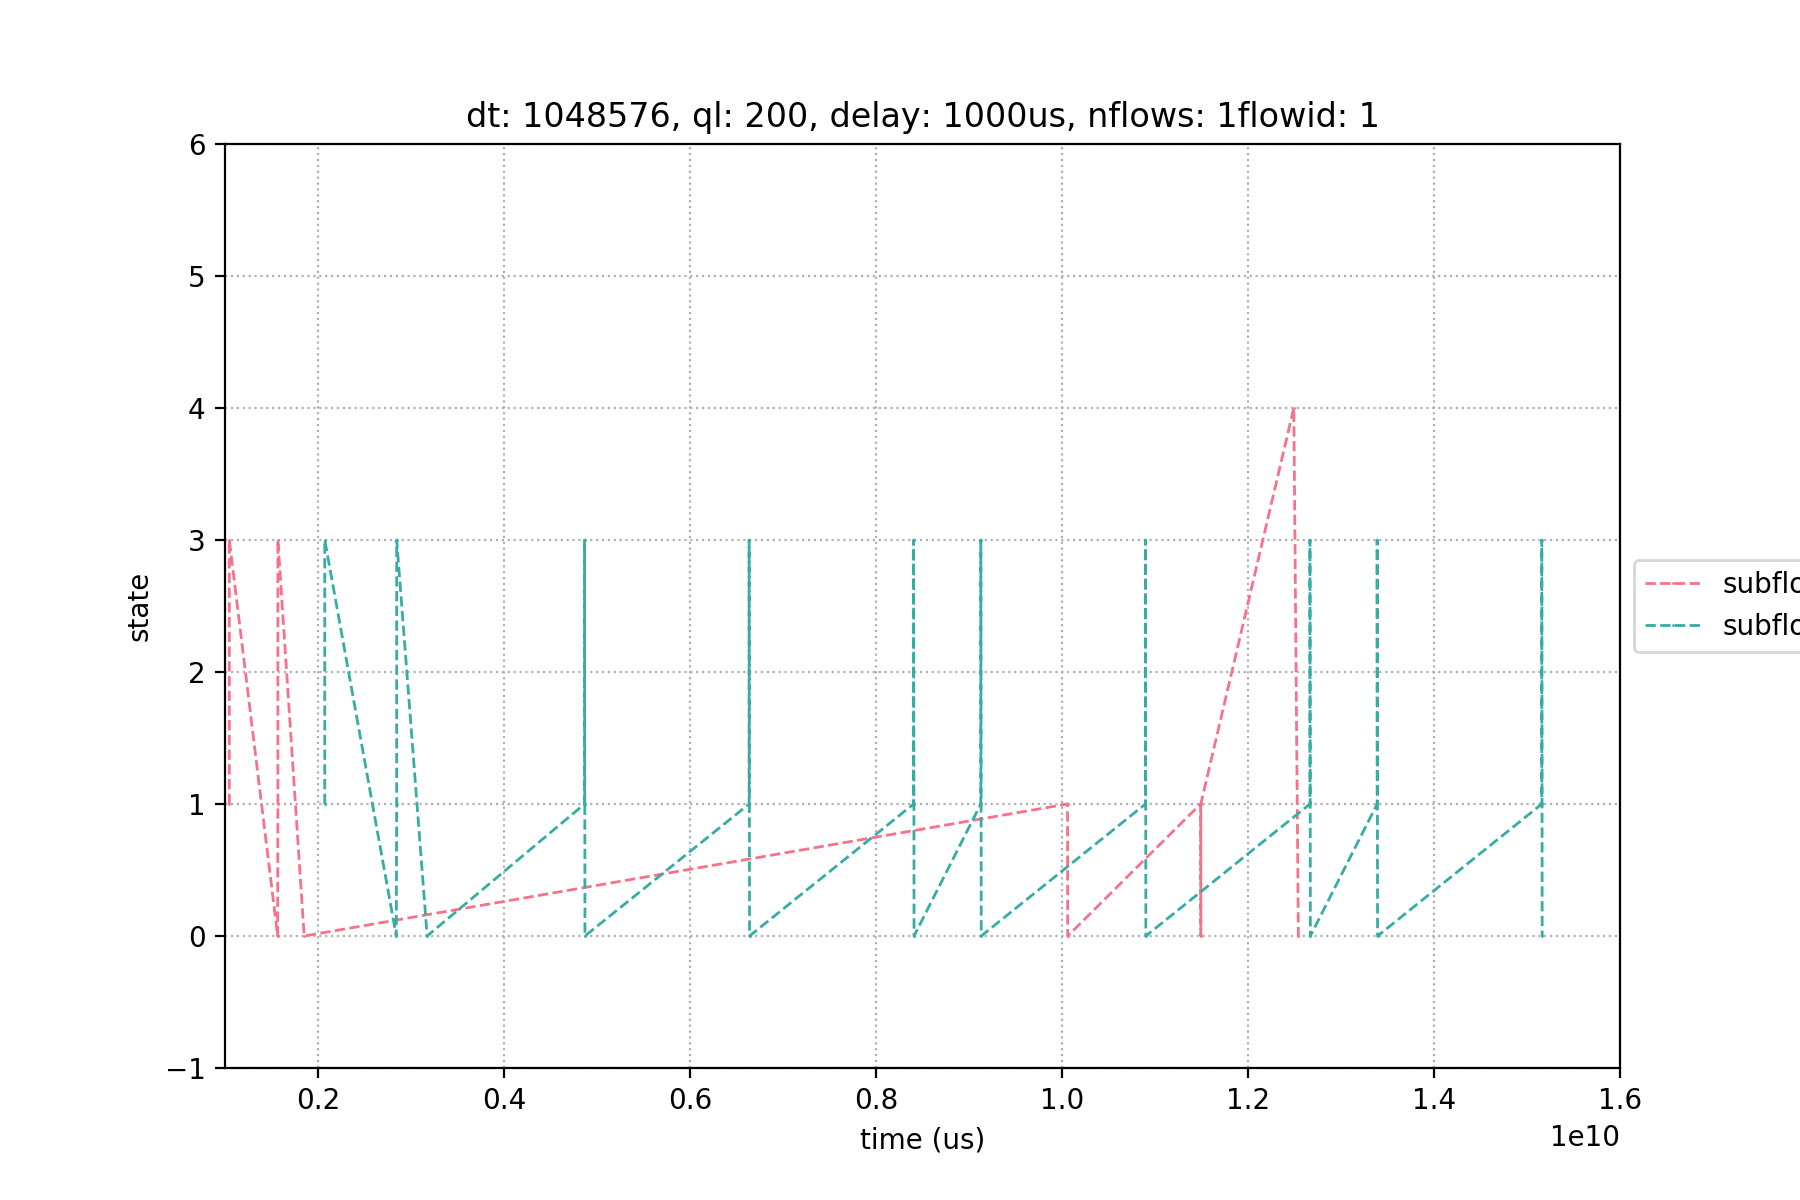

In [122]:
%matplotlib notebook
plot_cwnd(pdata, 1, 1048576, 200, 1000, 1, [0,1], markersize=2)
plot_state(pdata, 1, 1048576, 200, 1000, 1, [0,1], markersize=2)



<IPython.core.display.Javascript object>


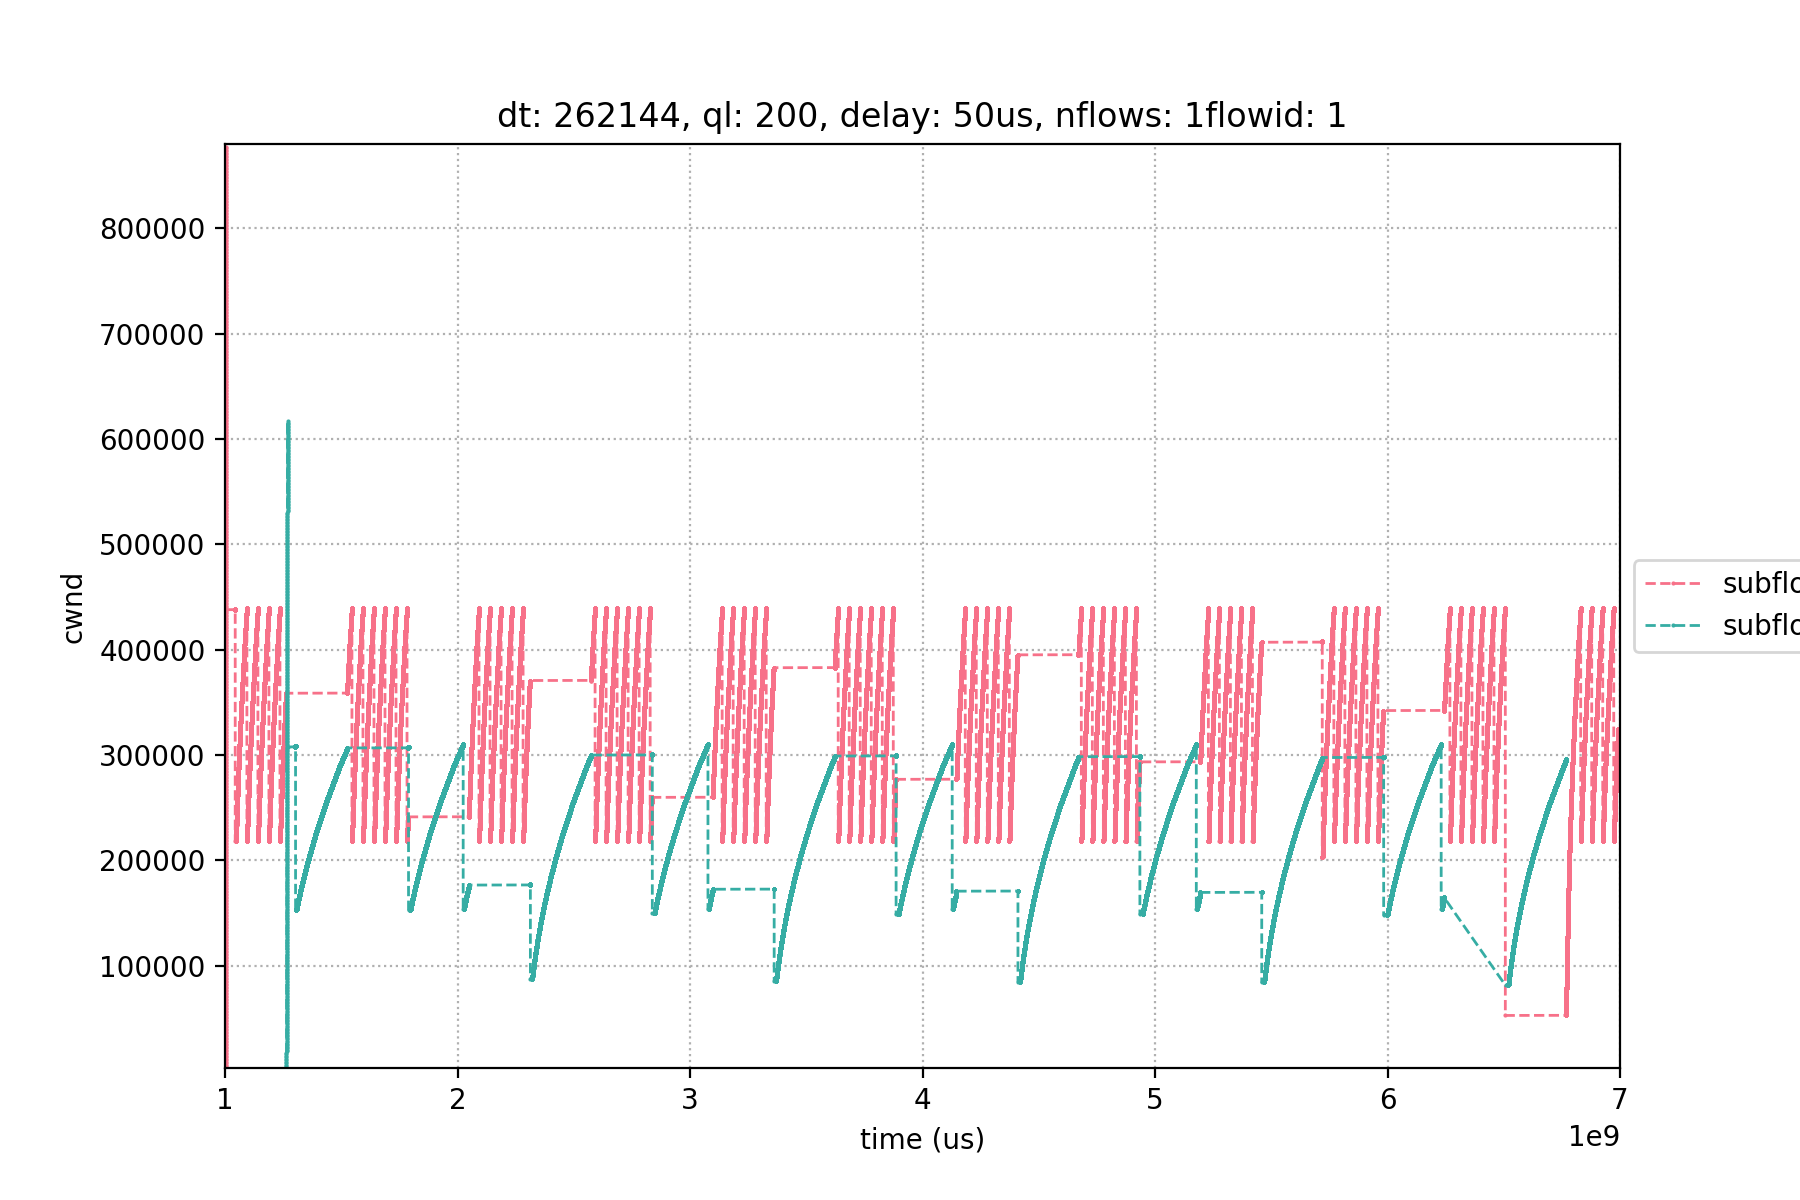

<IPython.core.display.Javascript object>


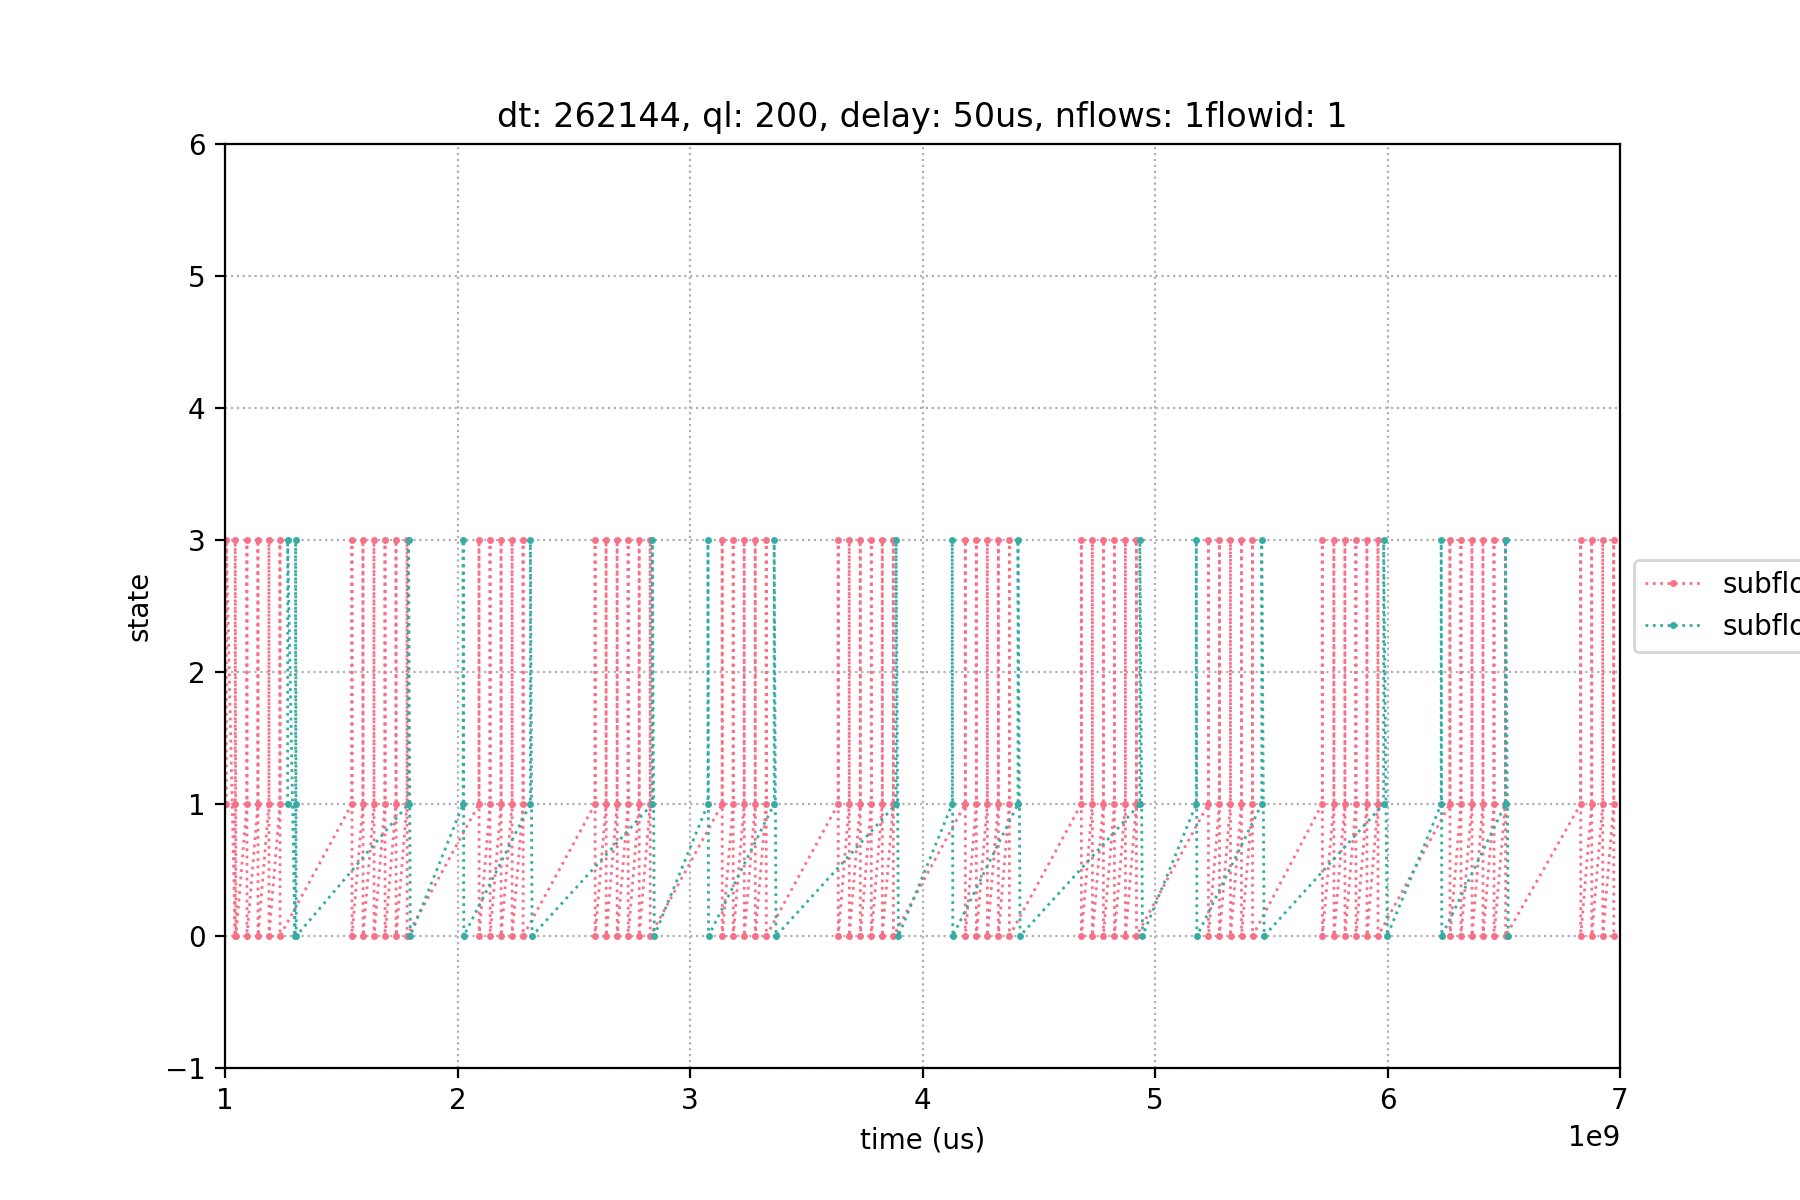

In [146]:
%matplotlib notebook
plot_cwnd(pdata, 1, 262144, 200, 50, 1, [0,1], markersize=3)
plot_state(pdata, 1, 262144, 200, 50, 1, [0,1], markersize=5)

<IPython.core.display.Javascript object>


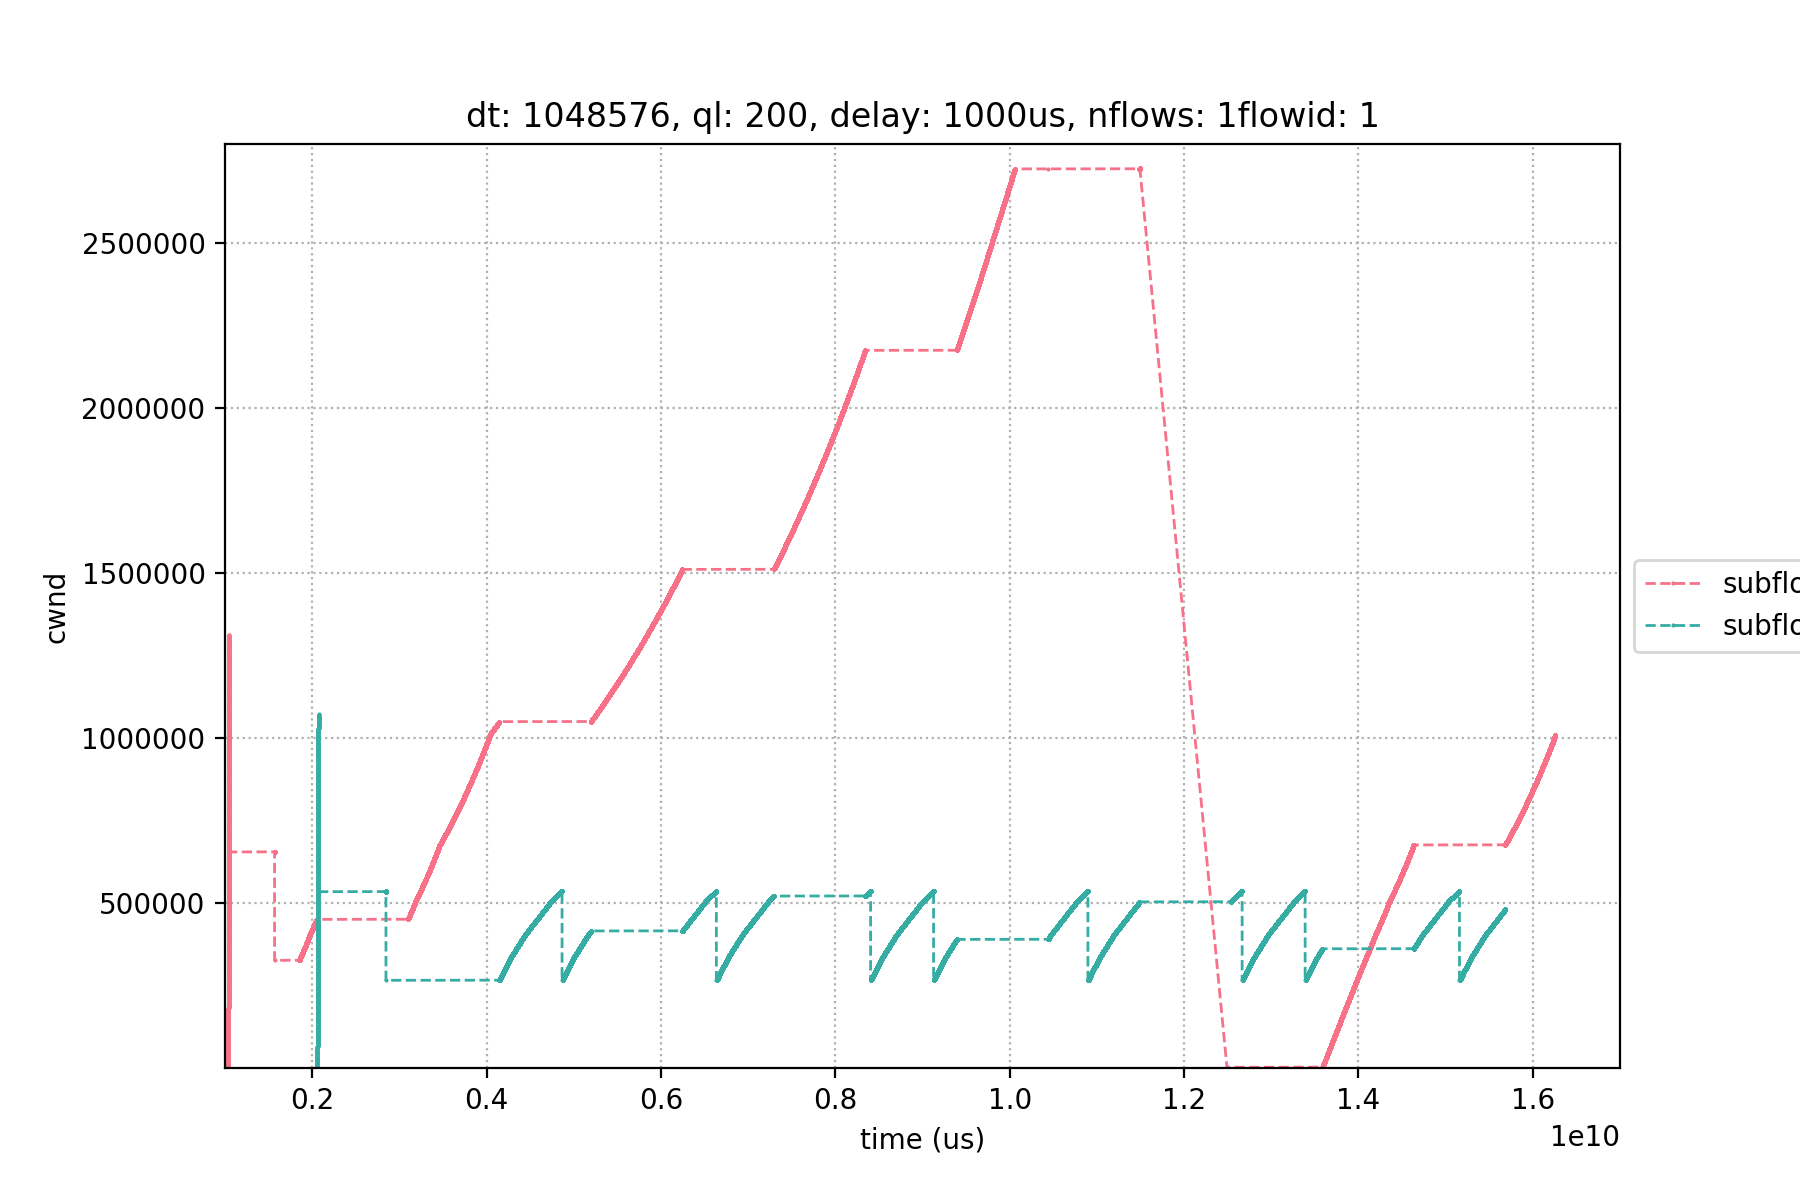

<IPython.core.display.Javascript object>


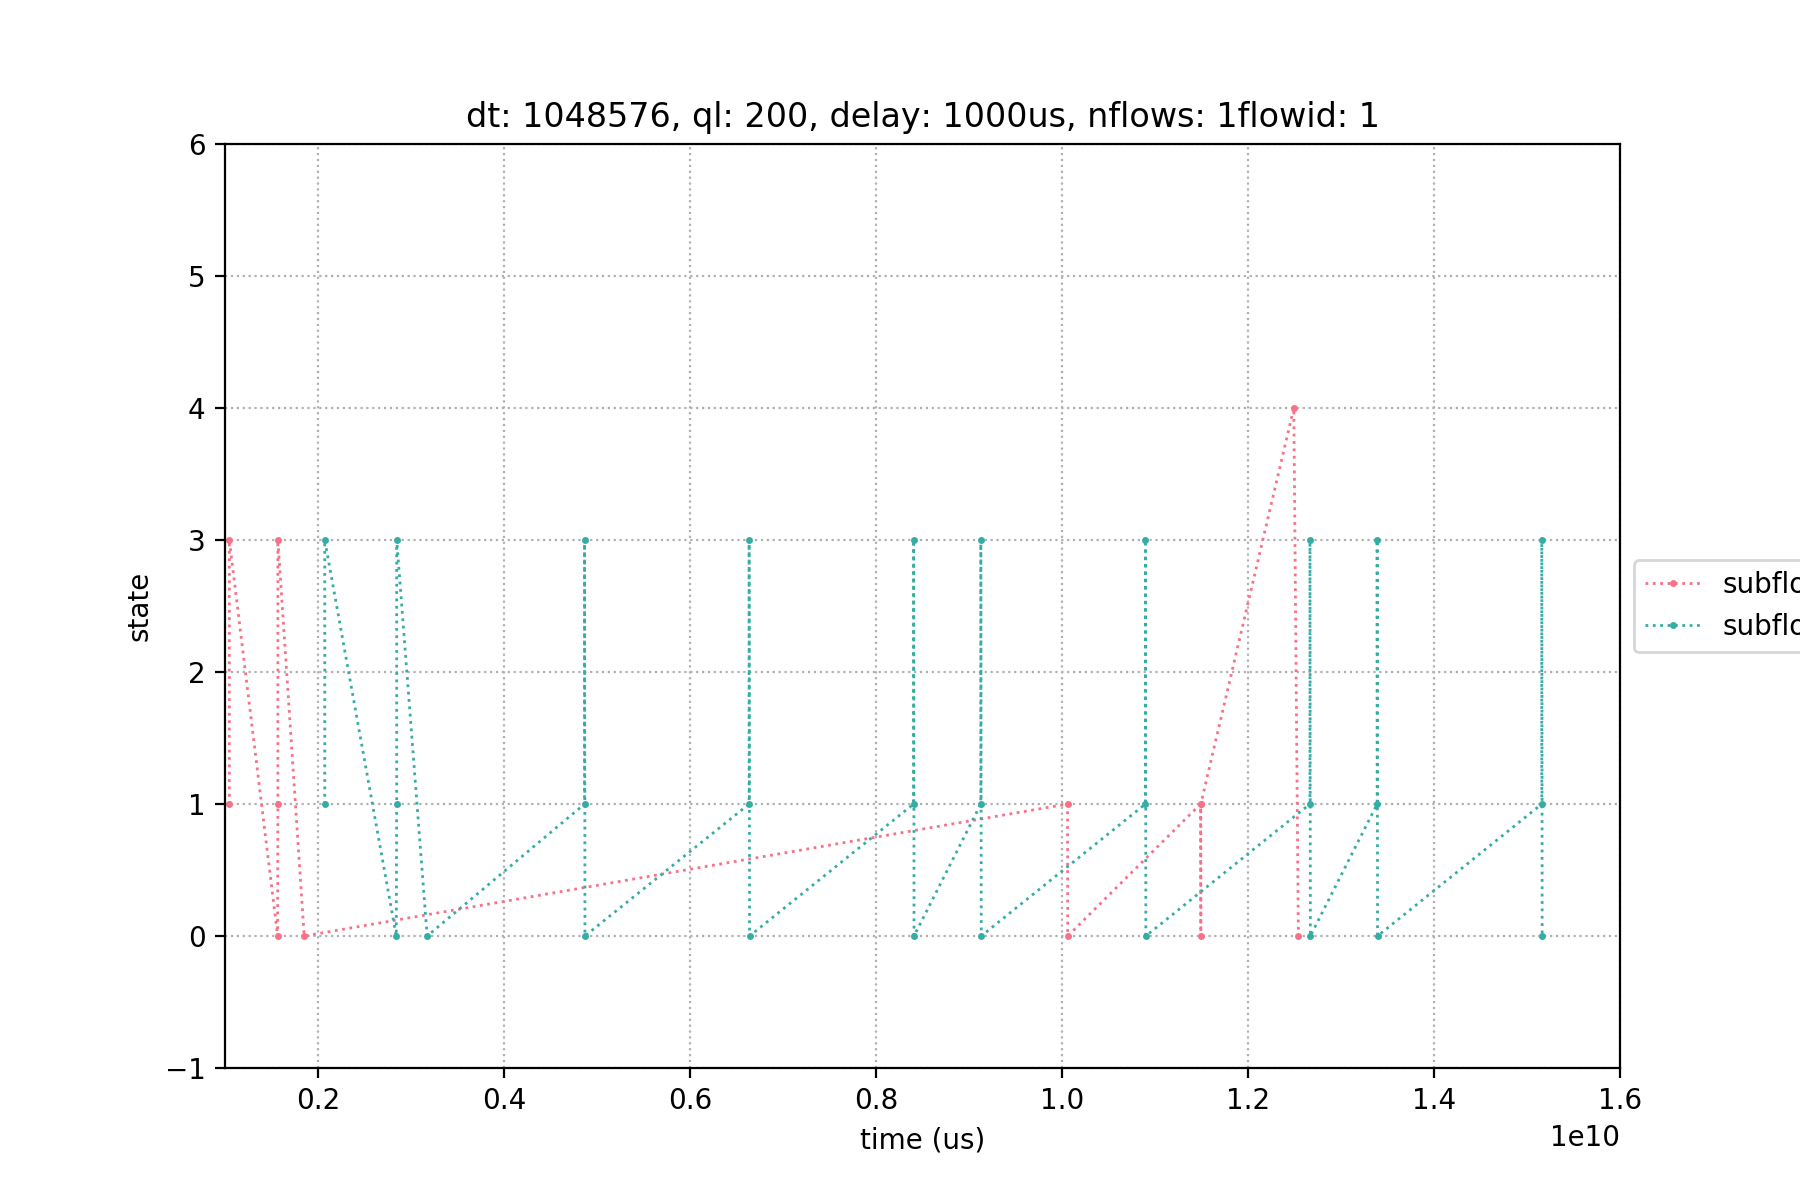

In [134]:
%matplotlib notebook
plot_cwnd(pdata, 1, 1048576, 200, 1000, 1, [0,1], markersize=3)
plot_state(pdata, 1, 1048576, 200, 1000, 1, [0,1], markersize=5)

In [79]:
pdata

tstamp       dt  nflows   ql  delay       fct  retrans  rto  \
0   11_25_2019_00_05_01   131072       1  100     50   7118995      801    0   
1   11_25_2019_00_05_09   131072       1  100    100   8196868     1034    0   
2   11_25_2019_00_05_19   131072       1  100    200  11962461     5084    0   
3   11_25_2019_00_05_29   131072       1  100    500  12395690     2149    0   
4   11_25_2019_00_05_40   131072       1  100   1000  24632505     3873    0   
5   11_25_2019_00_05_50   131072       1  100   2000  44027573     3990    0   
6   11_25_2019_00_06_01   131072       1  200     50   7306392     2513    0   
7   11_25_2019_00_06_10   131072       1  200    100   7394121     1881    0   
8   11_25_2019_00_15_12   131072       1  200    200   8700612     2076    0   
9   11_25_2019_00_15_57   131072       1  200    500  10936182     1720    0   
10  11_25_2019_00_17_16   131072       1  200   1000  10570303     1377    0   
11  11_25_2019_00_17_53   131072       1  200   2000  19985006     1018    0   
12  11_25_2019_00_18_34   262144       1  100     50   7082058     1086    0   
13  11_25_2019_00_21_39   262144       1  100    100   8356833     1097    0   
14  11_25_2019_00_27_37   262144       1  100    200  10001694     2108    0   
15  11_25_2019_00_30_40   262144       1  100    500  11122105     1489    0   
16  11_25_2019_00_32_57   262144       1  100   1000  19531548     1589    0   
17  11_25_2019_00_33_39   262144       1  100   2000  18652767     2108    0   
18  11_25_2019_00_34_00   262144       1  200     50   7004447     1464    0   
19  11_25_2019_00_34_10   262144       1  200    100   7351143     1262    0   
20  11_25_2019_00_34_30   262144       1  200    200   8369199      966    0   
21  11_25_2019_00_34_57   262144       1  200    500  10967899     2428    0   
22  11_25_2019_00_41_56   262144       1  200   1000  10323159     1352    0   
23  11_25_2019_00_45_04   262144       1  200   2000  34896078     2489    0   
24  11_25_2019_00_47_16   524288       1  100     50   6781572      670    0   
25  11_25_2019_00_48_41   524288       1  100    100   8367457      994    0   
26  11_25_2019_00_48_50   524288       1  100    200  11403917     2604    0   
27  11_25_2019_00_51_33   524288       1  100    500   9866090     1387    0   
28  11_25_2019_00_54_41   524288       1  100   1000  19886129     2886    0   
29  11_25_2019_00_56_52   524288       1  100   2000  38998270     3214    0   
30  11_25_2019_00_57_21   524288       1  200     50   7297173      857    0   
31  11_25_2019_00_58_17   524288       1  200    100   7402356     1277    0   
32  11_25_2019_00_59_39   524288       1  200    200   8398438     1029    0   
33  11_25_2019_01_01_14   524288       1  200    500  12632709     2403    0   
34  11_25_2019_01_08_16   524288       1  200   1000  20764753      876    0   
35  11_25_2019_01_08_53   524288       1  200   2000  20402771     2521    0   
36  11_25_2019_01_10_13  1048576       1  100     50   7077173      624    0   
37  11_25_2019_01_10_35  1048576       1  100    100   7855086      827    0   
38  11_25_2019_01_11_12  1048576       1  100    200   9948617     2493    0   
39  11_25_2019_01_15_44  1048576       1  100    500  10342557     1425    0   
40  11_25_2019_01_16_29  1048576       1  100   1000  10658531     1954    0   
41  11_25_2019_01_19_47  1048576       1  100   2000  44227134     4243    0   
42  11_25_2019_01_21_18  1048576       1  200     50   6537013      722    0   
43  11_25_2019_01_21_52  1048576       1  200    100   7305495      797    0   
44  11_25_2019_01_23_25  1048576       1  200    200   7917804      991    0   
45  11_25_2019_01_26_53  1048576       1  200    500  10645053     1683    0   
46  11_25_2019_01_28_43  1048576       1  200   1000  16259336      948    0   
47  11_25_2019_01_28_57  1048576       1  200   2000  23024192     2305    0   

    syn     rtt  
0     0   263.0  
1     0   352.0  
2     0   561.0  
3     0  1141.0  
4     

In [61]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>